Name: Ron Keinan

ID: 203735857

All the cells I added start with "RK"

I run qeustions 1-4, solved questions 5-6 and the final question with the Iris dataset

# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for this week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [ ]:
import pandas as pd

# Import the data using the file path
#filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
filepath = '/content/gdrive/MyDrive/Machine Learning course 5783/HW_data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(filepath)

In [ ]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [ ]:
data

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [ ]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [ ]:
# RK - see that now left only 18 features - without the 3 we dropped
data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [ ]:
#RK - see that now all columns contain only numbers
data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [ ]:
# RK - see all featured scaled between 0 to 1
data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [ ]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [ ]:
X_data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [ ]:
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churned, Length: 5000, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [ ]:
y_data.values[10:20],y_pred[10:20]

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [ ]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [ ]:
print(accuracy(y_data, y_pred))

0.9422


In [ ]:
# RK - let's check in a simple way, how much accurate is the KNN model:

def calc_acc(y_data, y_pred):
  different = 0
  for i in range(len(y_data)):
    if y_data.values[i] != y_pred[i]:
      different += 1

  print("Number of mistakes: ", different)
  mistake_per = (different/len(y_data))*100
  print("Percent of mistakes: ", mistake_per,"%")
  print("Accuracy: ", 100-mistake_per,"%")

calc_acc(y_data, y_pred)

Number of mistakes:  289
Percent of mistakes:  5.779999999999999 %
Accuracy:  94.22 %


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [ ]:
# RK - set a KNN model with weights of distance
# Weight function used in prediction - weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
knn5a = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
knn5a = knn5a.fit(X_data, y_data)
y_pred5a = knn5a.predict(X_data)
calc_acc(y_data, y_pred5a)

Number of mistakes:  0
Percent of mistakes:  0.0 %
Accuracy:  100.0 %


In [ ]:
# RK - set a KNN model with weights of uniform
# Weight function used in prediction - uniform weights. All points in each neighborhood are weighted equally.
# Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
knn5b = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', p=1)
knn5b = knn5b.fit(X_data, y_data)
y_pred5b = knn5b.predict(X_data)
calc_acc(y_data, y_pred5b)

Number of mistakes:  272
Percent of mistakes:  5.4399999999999995 %
Accuracy:  94.56 %


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [ ]:
# RK - check different K values:
k_acc_dic = {}

for i in range(1,21):
  knn6 = KNeighborsClassifier(n_neighbors=i, weights = 'uniform', p=1)
  knn6 = knn6.fit(X_data, y_data)
  y_pred6 = knn6.predict(X_data)
  k_acc_dic[i] = accuracy(y_data, y_pred6)

In [ ]:
# RK - the table of values:
k_acc_dic

{1: 1.0,
 2: 0.9286,
 3: 0.9456,
 4: 0.9214,
 5: 0.9356,
 6: 0.9216,
 7: 0.929,
 8: 0.917,
 9: 0.9256,
 10: 0.9126,
 11: 0.921,
 12: 0.9124,
 13: 0.9178,
 14: 0.9096,
 15: 0.9146,
 16: 0.9074,
 17: 0.9126,
 18: 0.9054,
 19: 0.9104,
 20: 0.9022}

Text(0, 0.5, 'Accuracy')

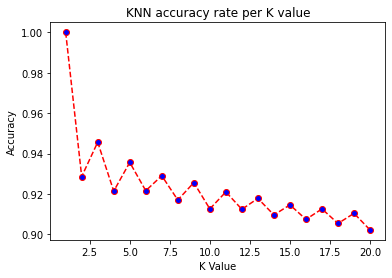

In [ ]:
# RK graph of the values:
import matplotlib.pylab as plt
lists = sorted(k_acc_dic.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, color = 'red', markerfacecolor = 'blue', linestyle = 'dashed', marker='o')
plt.title('KNN accuracy rate per K value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# Now with Iris

Load, shuffle and split Iris data (Lesson 1)
... don´t forget scaling features

In [ ]:
import numpy as np
import pandas as pd

filepath = '/content/gdrive/MyDrive/Machine Learning course 5783/HW_data/Iris_Data.csv'
data = pd.read_csv(filepath)
print(data.columns,data.shape)
data

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


X = frames, 
y = target

In [ ]:
y = data.pop('species').to_frame()
X = data

In [ ]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],             species
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virginica
 149  Iris-virginica
 
 [150 rows x

In [ ]:
np.std(X)

sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.75)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((37, 4), (37, 1), (113, 4), (113, 1))

In [ ]:
X_train,y_train

(     sepal_length  sepal_width  petal_length  petal_width
 116           6.5          3.0           5.5          1.8
 43            5.0          3.5           1.6          0.6
 46            5.1          3.8           1.6          0.2
 79            5.7          2.6           3.5          1.0
 48            5.3          3.7           1.5          0.2
 121           5.6          2.8           4.9          2.0
 124           6.7          3.3           5.7          2.1
 130           7.4          2.8           6.1          1.9
 141           6.9          3.1           5.1          2.3
 86            6.7          3.1           4.7          1.5
 87            6.3          2.3           4.4          1.3
 28            5.2          3.4           1.4          0.2
 115           6.4          3.2           5.3          2.3
 52            6.9          3.1           4.9          1.5
 29            4.7          3.2           1.6          0.2
 8             4.4          2.9           1.4          0

Train a k-NN classifier on the training data, test on the testing data, explore different settings, number of input features, accuracies, ..., compare with colleagues, write conclusions

In [ ]:
# RK - set a KNN model with weights of distance - Iris
# Weight function used in prediction - weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
knn7a = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
knn7a = knn7a.fit(X_train, y_train)
y_pred7a = knn7a.predict(X_test)
calc_acc(y_test, y_pred7a)

Number of mistakes:  5
Percent of mistakes:  4.424778761061947 %
Accuracy:  95.57522123893806 %


In [ ]:
# RK - check different K values - Iris:
k_acc_dic7 = {}

for i in range(1,21):
  knn7b = KNeighborsClassifier(n_neighbors=i, weights = 'uniform', p=1)
  knn7b = knn7b.fit(X_train, y_train)
  y_pred7b = knn7b.predict(X_test)
  k_acc_dic7[i] = accuracy(y_test['species'], y_pred7b)  

In [ ]:
# RK - the table of values - Iris:
k_acc_dic7

{1: 0.9557522123893806,
 2: 0.9026548672566371,
 3: 0.9380530973451328,
 4: 0.9380530973451328,
 5: 0.9292035398230089,
 6: 0.9203539823008849,
 7: 0.9557522123893806,
 8: 0.9203539823008849,
 9: 0.9469026548672567,
 10: 0.911504424778761,
 11: 0.9380530973451328,
 12: 0.8938053097345132,
 13: 0.9292035398230089,
 14: 0.8849557522123894,
 15: 0.8761061946902655,
 16: 0.8495575221238938,
 17: 0.8761061946902655,
 18: 0.831858407079646,
 19: 0.8407079646017699,
 20: 0.7964601769911505}

Text(0, 0.5, 'Accuracy')

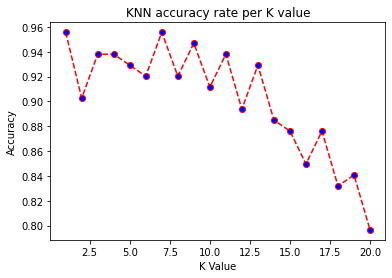

In [ ]:
# RK graph of the values - Iris:
import matplotlib.pylab as plt
lists7 = sorted(k_acc_dic7.items()) # sorted by key, return a list of tuples
x, y = zip(*lists7) # unpack a list of pairs into two tuples
plt.plot(x, y, color = 'red', markerfacecolor = 'blue', linestyle = 'dashed', marker='o')
plt.title('KNN accuracy rate per K value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')